## Imports

In [58]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd
from pandas.api.types import CategoricalDtype
# library to create visualizations
import seaborn as sns

# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as md

#from statsmodels.tsa.stattools import adfuller

import itertools

import nltk
from nltk.corpus import stopwords
import time

## Load DataFrame

In [54]:
path = "C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/DataFrames/"

# load unexploded
path_news = "All_news_articles.csv"
News_DataFrame = pd.read_csv(path+path_news, index_col=None,header=0)
News_DataFrame["Date_Info"] = pd.to_datetime(News_DataFrame["Date_Info"], format='%Y-%m-%d')

# load exploded
fileName_exploded ="All_news_articles_exploded.csv"
News_DataFrame_exploded = pd.read_csv(path+fileName_exploded, index_col=None,header=0)
News_DataFrame_exploded["Date_Info"] = pd.to_datetime(News_DataFrame_exploded["Date_Info"], format='%Y-%m-%d')

# Not exploded
# Spiegel
Spiegel_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Spiegel"]
# Sueddeutsche
Sueddeutsche_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Sueddeutsche"]
# Bild
Bild_DataFrame = News_DataFrame.loc[News_DataFrame["News_page"] == "Bild"]

# Exploded
# Spiegel
Spiegel_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Spiegel"]
# Sueddeutsche
Sueddeutsche_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Sueddeutsche"]
# Bild
Bild_DataFrame_exploded = News_DataFrame_exploded.loc[News_DataFrame_exploded["News_page"] == "Bild"]

C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\4237666986.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  News_DataFrame = pd.read_csv(path+path_news, index_col=None,header=0)
C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\4237666986.py:10: DtypeWarning: Columns (6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  News_DataFrame_exploded = pd.read_csv(path+fileName_exploded, index_col=None,header=0)


# Publishing Analysis

## Ammount of published news by media house

[Text(0.5, 0, 'Ammount of published news'), Text(0, 0.5, 'Media house')]

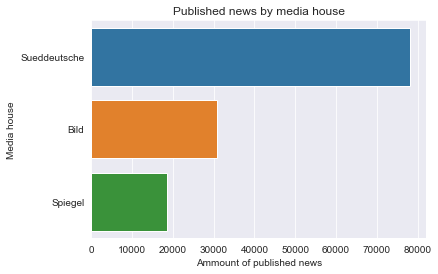

In [3]:
published_news = pd.DataFrame(News_DataFrame.News_page.value_counts())
ax = sns.barplot(x = "News_page", y=published_news.index,data=published_news,orient="h")
ax.set(title="Published news by media house")
ax.set(xlabel="Ammount of published news", ylabel = "Media house")

## Published articles by weekday

In [59]:
day_size_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", "Sunday"],
    ordered=True
)

## Published articles by weekday - Spiegel

C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\2172185097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spiegel_DataFrame["weekday_name"] = Spiegel_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\2172185097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spiegel_DataFrame['weekday_name'] = Spiegel_DataFrame['weekday_name'].astype(day_size_order)


[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'Weekday')]

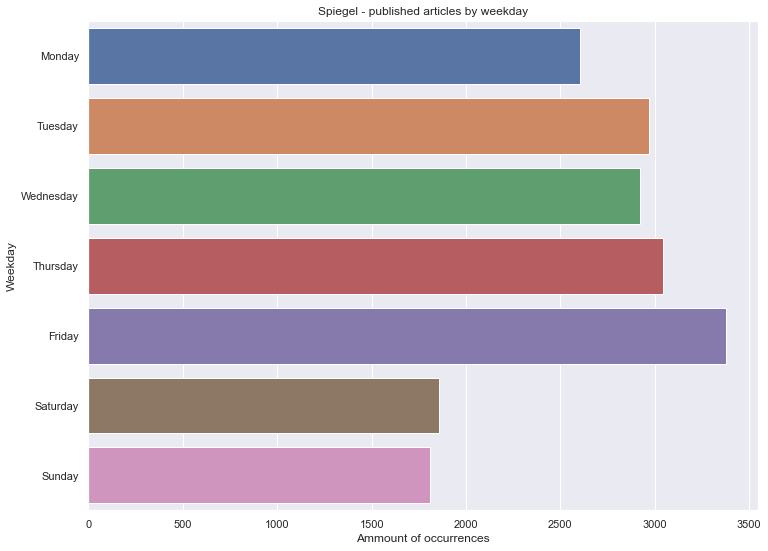

In [90]:
Spiegel_DataFrame["weekday_name"] = Spiegel_DataFrame['Date_Info'].dt.day_name()

Spiegel_DataFrame['weekday_name'] = Spiegel_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Spiegel_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

plt.title("Spiegel - published articles by weekday")

ax = sns.barplot(x = values, y=keys,orient="h")
ax.set(title="Spiegel - published articles by weekday")
ax.set(xlabel="Ammount of occurrences", ylabel = "Weekday")

## Published articles by weekday - Sueddeutsche

C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\1008757305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sueddeutsche_DataFrame["weekday_name"] = Sueddeutsche_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\1008757305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sueddeutsche_DataFrame['weekday_name'] = Sueddeutsche_DataFrame['weekday_name'].astype(day_size_order)


[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'Weekday')]

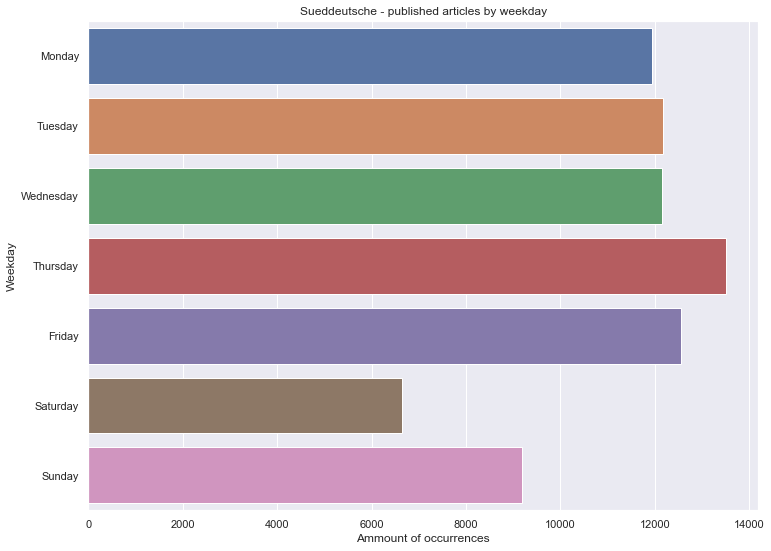

In [91]:
Sueddeutsche_DataFrame["weekday_name"] = Sueddeutsche_DataFrame['Date_Info'].dt.day_name()

Sueddeutsche_DataFrame['weekday_name'] = Sueddeutsche_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Sueddeutsche_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

plt.title("Sueddeutsche - published articles by weekday")

ax = sns.barplot(x = values, y=keys,orient="h")
ax.set(title="Sueddeutsche - published articles by weekday")
ax.set(xlabel="Ammount of occurrences", ylabel = "Weekday")

## Published articles by weekday - Bild

C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\2997514327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bild_DataFrame["weekday_name"] = Bild_DataFrame['Date_Info'].dt.day_name()
C:\Users\Jan\AppData\Local\Temp\ipykernel_1788\2997514327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bild_DataFrame['weekday_name'] = Bild_DataFrame['weekday_name'].astype(day_size_order)


[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'Weekday')]

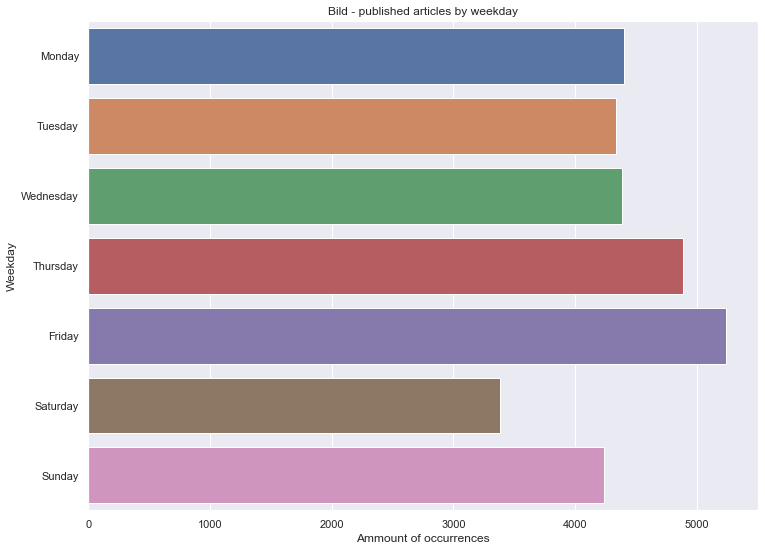

In [92]:
Bild_DataFrame["weekday_name"] = Bild_DataFrame['Date_Info'].dt.day_name()

Bild_DataFrame['weekday_name'] = Bild_DataFrame['weekday_name'].astype(day_size_order)

weekday_count = Bild_DataFrame["weekday_name"].value_counts().sort_values()
values = weekday_count.values
keys = weekday_count.keys()

plt.title("Bild - published articles by weekday")

ax = sns.barplot(x = values, y=keys,orient="h")
ax.set(title="Bild - published articles by weekday")
ax.set(xlabel="Ammount of occurrences", ylabel = "Weekday")

# Category Analysis

## Categories Spiegel

[Text(0.5, 0, 'Ammount of publications'), Text(0, 0.5, 'Category')]

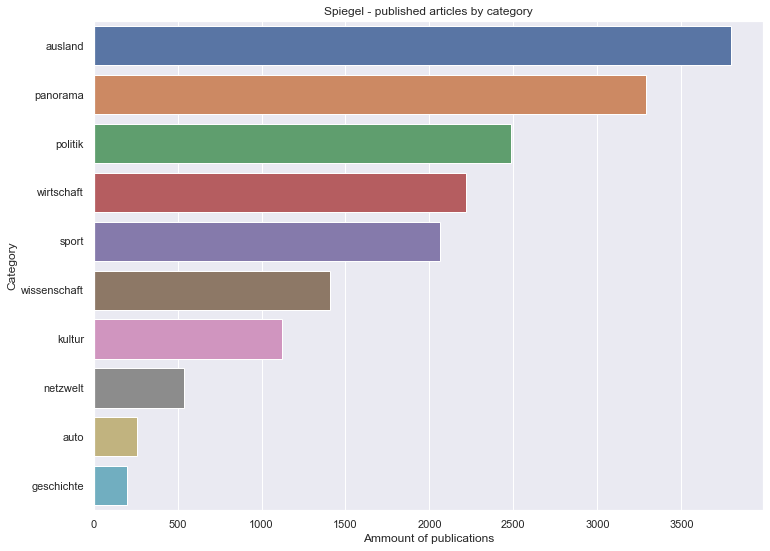

In [102]:
categories_spiegel = pd.DataFrame(Spiegel_DataFrame["Kategorie"].value_counts()[:10])

ax = sns.barplot(x = categories_spiegel.Kategorie, y=categories_spiegel.index,data=categories_spiegel,orient="h")
ax.set(title="Spiegel - published articles by category")
ax.set(xlabel="Ammount of publications", ylabel = "Category")

## Categories Sueddeutsche

[Text(0.5, 0, 'Ammount of publications'), Text(0, 0.5, 'Category')]

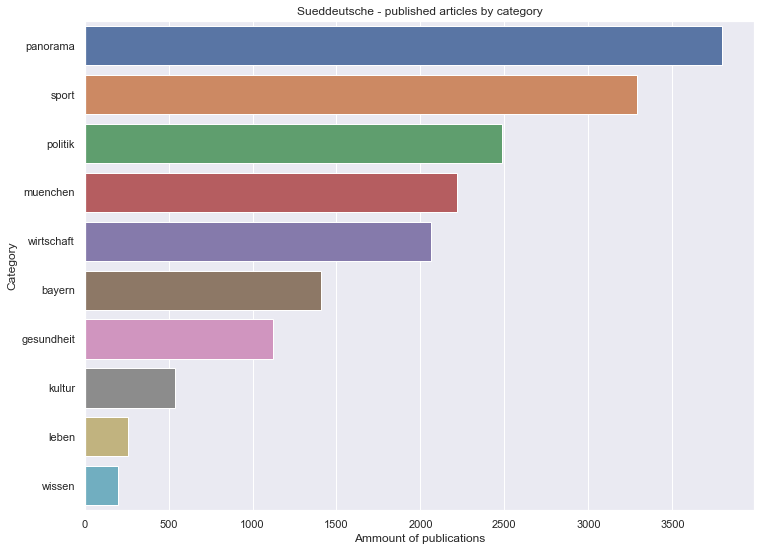

In [104]:
categories_sueddeutsche = pd.DataFrame(Sueddeutsche_DataFrame["Kategorie"].value_counts()[:10])

ax = sns.barplot(x = categories_spiegel.Kategorie, y=categories_sueddeutsche.index,data=categories_sueddeutsche,orient="h")
ax.set(title="Sueddeutsche - published articles by category")
ax.set(xlabel="Ammount of publications", ylabel = "Category")

## Categories Bild

[Text(0.5, 0, 'Ammount of publications'), Text(0, 0.5, 'Category')]

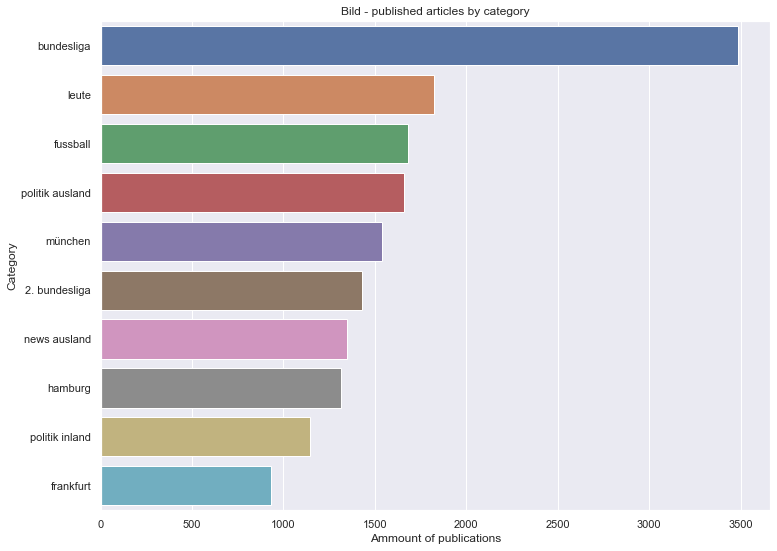

In [105]:
categories_bild = pd.DataFrame(Bild_DataFrame["Kategorie"].value_counts()[:10])
ax = sns.barplot(x = categories_bild.Kategorie, y=categories_bild.index,data=categories_bild,orient="h")
ax.set(title="Bild - published articles by category")
ax.set(xlabel="Ammount of publications", ylabel = "Category")

# KeyWords Analysis

## Highest occurring keyWords in news

[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'KeyWords')]

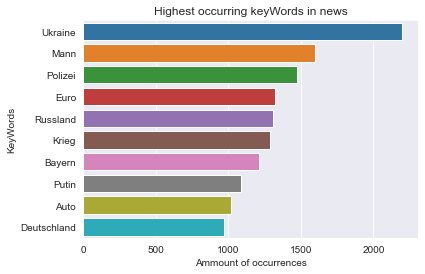

In [4]:
all_keyWords_occurence = pd.DataFrame(News_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=all_keyWords_occurence.index,data=all_keyWords_occurence,orient="h")
ax.set(title="Highest occurring keyWords in news")
ax.set(xlabel="Ammount of occurrences", ylabel = "KeyWords")

## Highest occurring keyWord by news media

### Highest occurring keyWord in Spiegel

[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'KeyWords')]

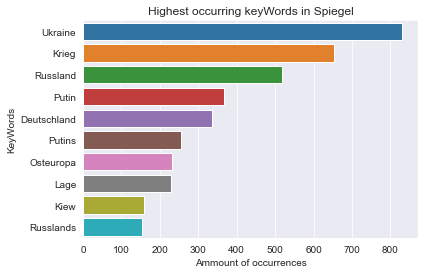

In [6]:
spiegel_keyWords_occurence = pd.DataFrame(Spiegel_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=spiegel_keyWords_occurence.index,data=spiegel_keyWords_occurence,orient="h")
ax.set(title="Highest occurring keyWords in Spiegel")
ax.set(xlabel="Ammount of occurrences", ylabel = "KeyWords")

### Highest occurring keyWord in Sueddeutsche

[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'KeyWords')]

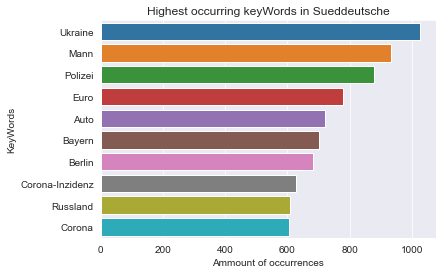

In [7]:
sueddeutsche_keyWords_occurence = pd.DataFrame(Sueddeutsche_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=sueddeutsche_keyWords_occurence.index,data=sueddeutsche_keyWords_occurence,orient="h")
ax.set(title="Highest occurring keyWords in Sueddeutsche")
ax.set(xlabel="Ammount of occurrences", ylabel = "KeyWords")

### Highest occurring keyWord in Bild

[Text(0.5, 0, 'Ammount of occurrences'), Text(0, 0.5, 'KeyWords')]

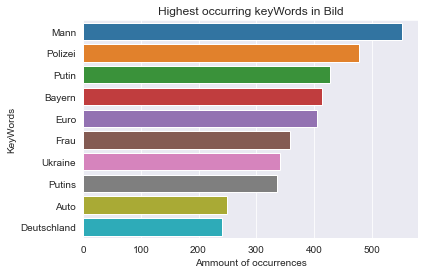

In [8]:
Bild_keyWords_occurence = pd.DataFrame(Bild_DataFrame_exploded.Tokens.value_counts()[:10])
ax = sns.barplot(x = "Tokens", y=Bild_keyWords_occurence.index,data=Bild_keyWords_occurence,orient="h")
ax.set(title="Highest occurring keyWords in Bild")
ax.set(xlabel="Ammount of occurrences", ylabel = "KeyWords")

## Which keyWords occure most with the top keyWords in title over all media houses

In [51]:
def get_accompanying_keyWords(keyWords, dataFrame):
    media_house = pd.DataFrame(dataFrame.News_page).reset_index().loc[0]["News_page"]
    sns.set(rc={'figure.figsize':(12,9)})
    for keyWord in keyWords:
        print(keyWord)
        # get all articles of interest
        Titel_interesting = pd.DataFrame(dataFrame.loc[dataFrame["Tokens"] == keyWord].Titel)

        # tokenize
        Titel_interesting["Tokens"] = Titel_interesting.apply(lambda row: nltk.word_tokenize(row['Titel']), axis=1)

        # explode
        Titel_interesting = Titel_interesting.explode("Tokens")

        # remove stopwords #1
        Titel_interesting = Titel_interesting[~Titel_interesting['Tokens'].isin(stopwords.words("german"))]
        # more stopwords
        # continues extension
        uninteresting_titles= ["Der", "Die", "Das","Was","Warum","Er","Sie", "Es", "Ich", "Du", "Mit","Wie","Ein","So","Wir","Nach","Am","An","B","Bei","Beim","Bin","Bis","Co","Da","Hier","Diese","Darum","Mehr","Jetzt","Wer","A","C",":","»","«", "," ,"\'\'","``", "_","-" ".","?","–", "-",".","!","(",")","„","“","<",">","außer","Wenn","Alles",keyWord]
        Titel_interesting=Titel_interesting[~Titel_interesting.Tokens.isin(uninteresting_titles)]

        # remove words that start with lower
        Titel_interesting = Titel_interesting[Titel_interesting["Tokens"].str.istitle()]

        accompanying_keyWords = pd.DataFrame(Titel_interesting.Tokens.value_counts())[:10]

        plt.figure()
        plt.ion()
        ax = sns.barplot(x = "Tokens", y=accompanying_keyWords.index,data=accompanying_keyWords,orient="h");
        ax.set(title=f"Highest occurring accompanying keyWords for \"{keyWord}\" in {media_house}")
        ax.set(xlabel="Ammount of occurrences", ylabel = "KeyWords")
        figure = ax.get_figure()
        figure.savefig(f"C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/Plots/Accompanying Keywords/{media_house}/accompanying keywords for {keyWord} in {media_house}.png",bbox_inches='tight')

#All media houses
get_accompanying_keyWords(all_keyWords_occurence.index.tolist(), News_DataFrame_exploded)

# Spiegel
get_accompanying_keyWords(spiegel_keyWords_occurence.index.tolist(), Spiegel_DataFrame_exploded)

# Sueddeutsche
get_accompanying_keyWords(sueddeutsche_keyWords_occurence.index.tolist(), Sueddeutsche_DataFrame_exploded)

# Bild
get_accompanying_keyWords(Bild_keyWords_occurence.index.tolist(), Bild_DataFrame_exploded)